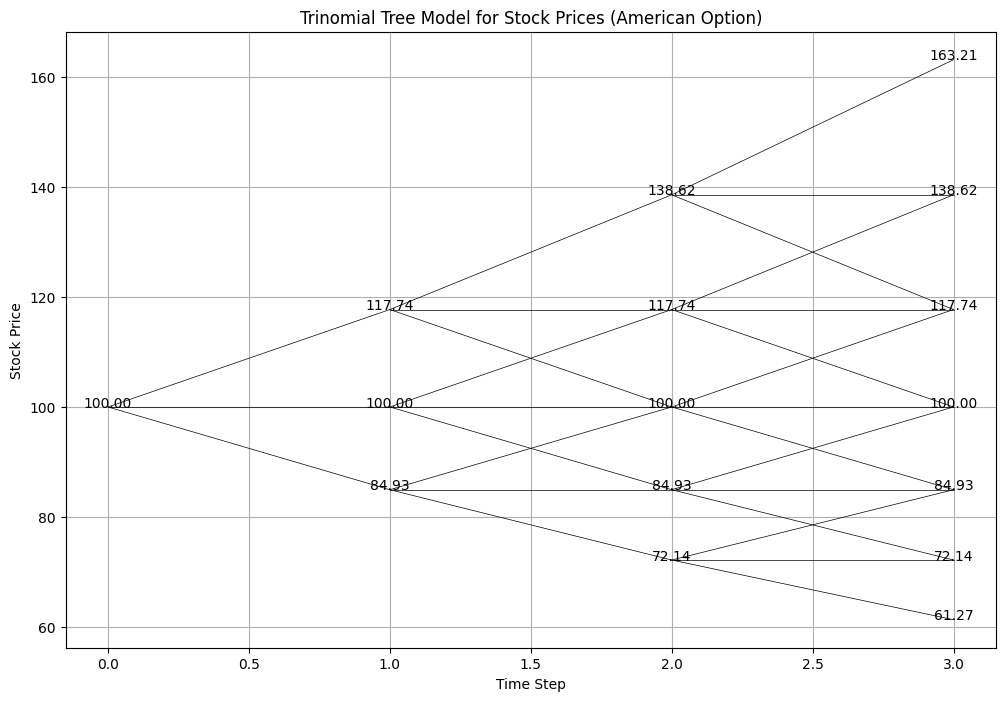

미국형 콜 옵션 가격: 10.12557261486227


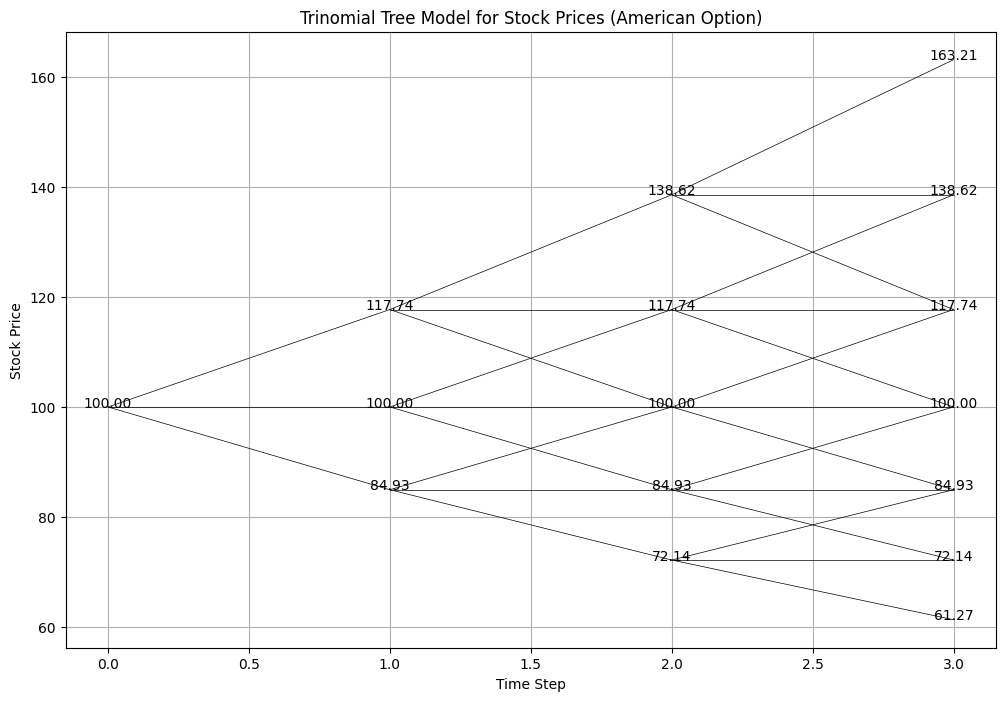

미국형 풋 옵션 가격: 5.8388046971469425


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trinomial_tree_model_american(S0, K, T, r, sigma, N, option_type="call"):
    """
    Trinomial Tree 모델을 사용하여 미국형 옵션 가격을 계산하는 함수 및 시각화

    Parameters:
    S0: 초기 주식 가격
    K: 행사가격 (strike price)
    T: 옵션 만기 시간
    r: 무위험 이자율
    sigma: 주식 가격의 변동성
    N: 시간 단계의 수
    option_type: "call" 또는 "put"

    Returns:
    옵션의 현재 가격
    """
    # 시간 단계 크기
    dt = T / N
    # 상승, 하락 및 변하지 않을 확률 계산
    u = np.exp(sigma * np.sqrt(2 * dt))
    d = 1 / u
    m = 1
    pu = ((np.exp(r * dt / 2) - np.exp(-sigma * np.sqrt(dt / 2))) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pd = ((np.exp(sigma * np.sqrt(dt / 2)) - np.exp(r * dt / 2)) / (np.exp(sigma * np.sqrt(dt / 2)) - np.exp(-sigma * np.sqrt(dt / 2))))**2
    pm = 1 - pu - pd

    # 주식 가격 트리 생성
    stock_prices = np.zeros((2 * N + 1, N + 1))
    stock_prices[N, 0] = S0
    for i in range(1, N + 1):
        for j in range(2 * N + 1):
            if stock_prices[j, i - 1] != 0:
                stock_prices[j - 1, i] = stock_prices[j, i - 1] * d
                stock_prices[j, i] = stock_prices[j, i - 1] * m
                stock_prices[j + 1, i] = stock_prices[j, i - 1] * u

    # 마지막 단계의 옵션 가치 계산
    option_values = np.zeros((2 * N + 1, N + 1))
    if option_type == "call":
        option_values[:, N] = np.maximum(0, stock_prices[:, N] - K)
    else:
        option_values[:, N] = np.maximum(0, K - stock_prices[:, N])

    # 이전 단계로 돌아가면서 옵션 가치 계산
    for i in range(N - 1, -1, -1):
        for j in range(2 * N + 1):
            if stock_prices[j, i] != 0:
                continuation_value = np.exp(-r * dt) * (pu * option_values[j + 1, i + 1] + pm * option_values[j, i + 1] + pd * option_values[j - 1, i + 1])
                if option_type == "call":
                    exercise_value = np.maximum(0, stock_prices[j, i] - K)
                else:
                    exercise_value = np.maximum(0, K - stock_prices[j, i])
                option_values[j, i] = np.maximum(continuation_value, exercise_value)

    # 시각화
    plt.figure(figsize=(12, 8))
    for i in range(N + 1):
        for j in range(2 * N + 1):
            if stock_prices[j, i] != 0:
                plt.text(i, stock_prices[j, i], f'{stock_prices[j, i]:.2f}', fontsize=10, ha='center')
                if i < N:
                    plt.plot([i, i + 1], [stock_prices[j, i], stock_prices[j + 1, i + 1]], 'k-', lw=0.5)
                    plt.plot([i, i + 1], [stock_prices[j, i], stock_prices[j, i + 1]], 'k-', lw=0.5)
                    plt.plot([i, i + 1], [stock_prices[j, i], stock_prices[j - 1, i + 1]], 'k-', lw=0.5)

    plt.title('Trinomial Tree Model for Stock Prices (American Option)')
    plt.xlabel('Time Step')
    plt.ylabel('Stock Price')
    plt.grid(True)
    plt.show()

    return option_values[N, 0]

# 예제 파라미터
S0 = 100  # 초기 주식 가격
K = 100  # 행사가격
T = 1  # 만기 시간 (1년)
r = 0.05  # 무위험 이자율
sigma = 0.2  # 변동성
N = 3  # 시간 단계 수

# 미국형 콜 옵션 가격 계산 및 시각화
call_option_price = trinomial_tree_model_american(S0, K, T, r, sigma, N, option_type="call")
print(f"미국형 콜 옵션 가격: {call_option_price}")

# 미국형 풋 옵션 가격 계산 및 시각화
put_option_price = trinomial_tree_model_american(S0, K, T, r, sigma, N, option_type="put")
print(f"미국형 풋 옵션 가격: {put_option_price}")

